# Sample_Kaggle_Submission-DSI-9

### 04_Production _Model_and_Insight

# <font color='black'> Content:

4 [Production_Model_and_Insights](#04-Production-Model-and-Insights)
----------------------------------------------

* [Model](#Model)
* [Ridge VS Lasso](#Ridge-VS-Lasso)
* [Metrics](#Metrics)
* [Kaggle Sumbission](#Kaggle-Sumbission)
* [ Insight: Further Exploration](#Insight:-Further-Exploration)


[Conclusion](#Conclusion)
---------------------------------------------------------------------------------------------------------


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew, boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Lasso

sns.set_style('whitegrid')
%matplotlib inline

In [127]:
# Load Data from Part 2
%store -r df_train
%store -r df_test
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r feat_lasso
%store -r X
%store -r y_hat_lr_train
%store -r y_hat_lr_test
%store -r features
%store -r our_model
%store -r y


# Model

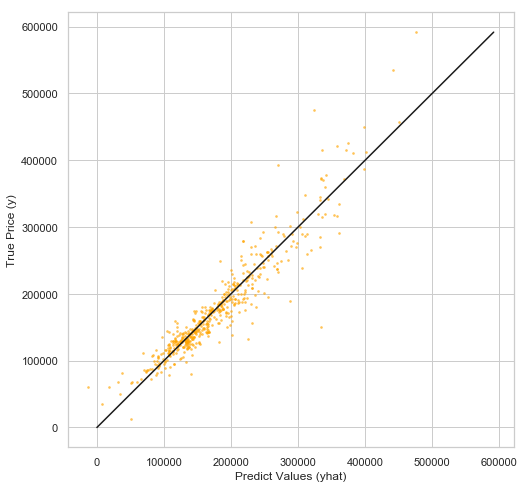

In [129]:
# Plot the model
plt.figure(figsize=(8,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_hat_lr_test, y_test, alpha = 0.5, s = 3, c = 'orange')
plt.xlabel('Predict Values (yhat)')
plt.ylabel('True Price (y)')

# This makes the 45 degree line
plt.plot([0, np.max(y)], [0, np.max(y)], c='k');

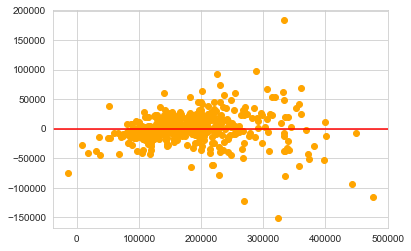

In [3]:
# Residual plot
residuals = y_hat_lr_test - y_test
plt.scatter(y_hat_lr_test, residuals, c = 'orange')
plt.axhline(0, color = 'red')

## Ridge VS Lasso

In [4]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
lasso = LassoCV(n_alphas=200)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [5]:
# Testing lasso
lasso.fit(X_train_sc, y_train)
pred_l = lasso.predict(X_test_sc)
lasso.score(X_train_sc, y_train)

/Users/juliazaytseva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9250966246259783

In [6]:
# Lasso on test data
lasso.score(X_test_sc, y_test)

0.8865227504178365

In [7]:
# Ridge
ridge.fit(X_train_sc, y_train) 
pred = ridge.predict(X_test_sc)

In [8]:
ridge.score(X_train_sc, y_train)

0.9278652790641243

In [9]:
# Ridge on testing data
ridge.score(X_test_sc, y_test)

0.8843876838231657

## Ridge performed better on train data set. However, compared to Ridge all 3 metrics did worse. The extent of the overfit is smaller using Lasso however since the Testing $R^2$ is only 0.041 lower than the Training $R^2$.



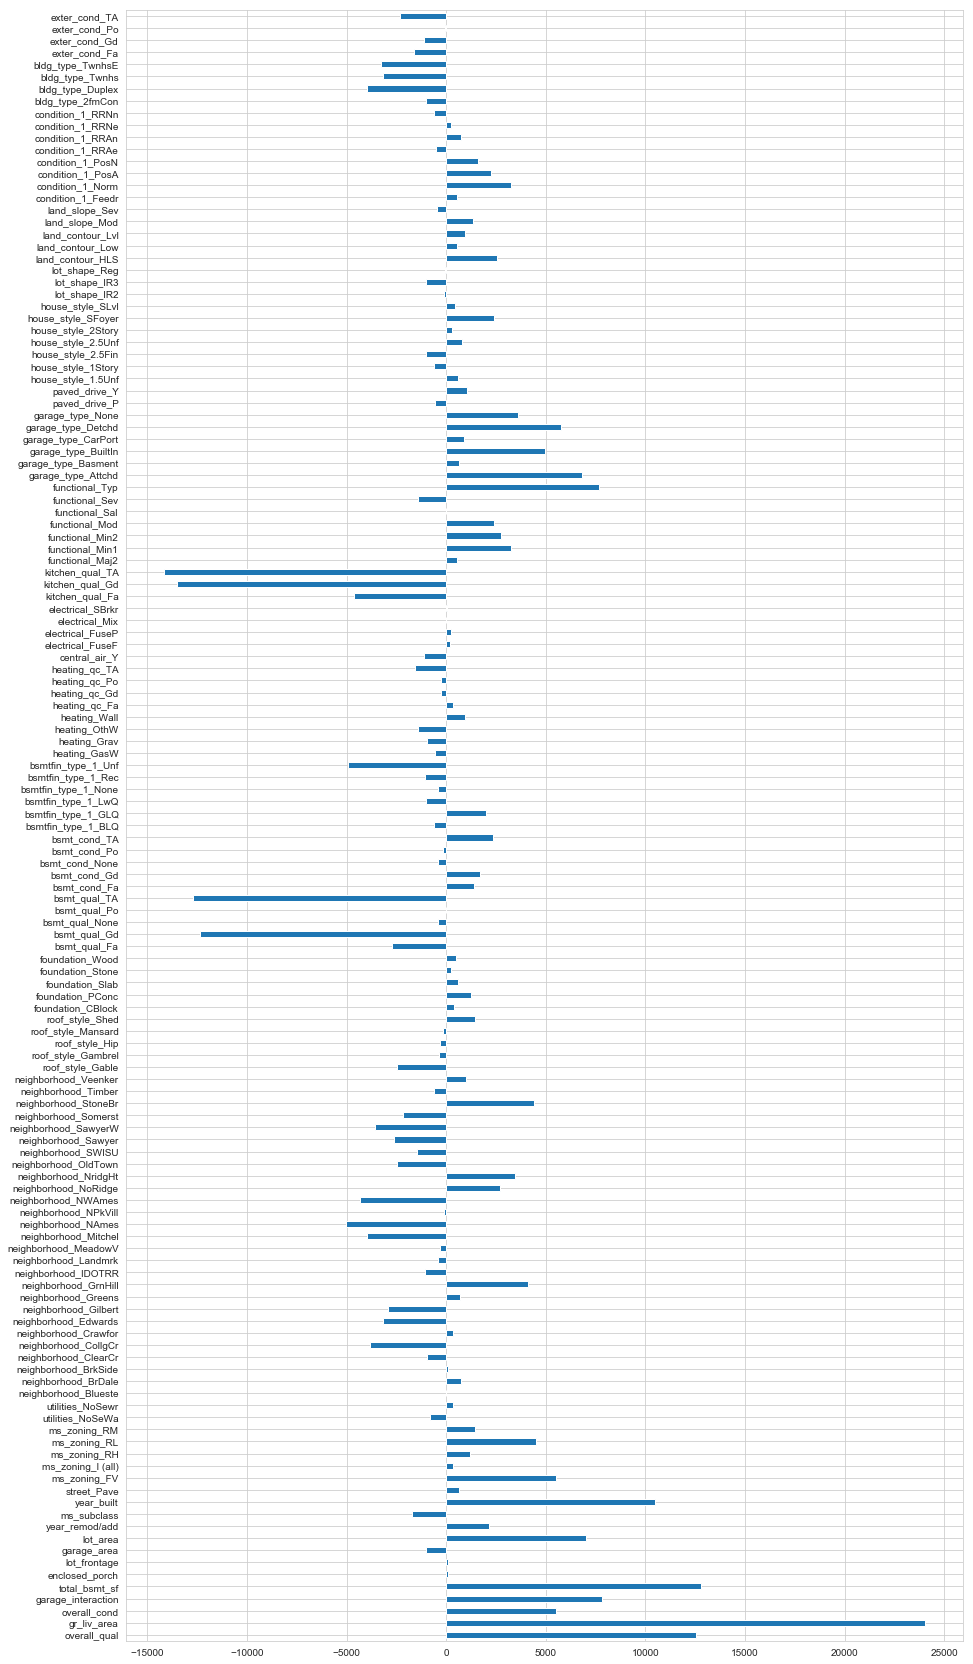

In [11]:
pd.Series(ridge.coef_, index=X.columns).plot.barh(figsize=(15, 30));

We see that Ridge regularization preserved most of the coefficients and interestingly we see 2 of the top 3 correlated features with our target, Gr Liv Area and Overall Qual, showing up with the largest positive coefficients. While Extern Qual was the second highest correlated feature with SalePrice, Ridge penalized its coefficient during regularization.

## Metrics

In [14]:
from sklearn import metrics

In [15]:
# Function to return metrics from model
def metrics_a(y, y_pred):
    MSE = np.round(metrics.mean_squared_error(y_pred, y), 2)
    RMSE = np.round(MSE ** (1/2),2)
    MAE = np.round(metrics.mean_absolute_error(y, y_pred), 2)
    R2 = np.round(metrics.r2_score(y,y_pred), 2)
    SSE = np.round(((y_pred - y.mean())**2).sum(),2)
    RSS = np.round(((y - y_pred) ** 2).sum(),2)
    return "MSE: "+ str(MSE), "RMSE: "+ str(RMSE), "MAE: "+ str(MAE), "R2 :"+ str(R2), "SSE: " + str(SSE), "RSS: "+ str(RSS)

In [16]:
#Metrics for the Linear Regression training data
metrics_a(y_hat_lr_train, y_train)

('MSE: 422047868.33',
 'RMSE: 20543.8',
 'MAE: 14162.21',
 'R2 :0.92',
 'SSE: 8936838485481.05',
 'RSS: 642356855593.21')

In [17]:
# Metrics for the Linear Regression testing data
metrics_a(y_hat_lr_test, y_test)

('MSE: 672030753.04',
 'RMSE: 25923.56',
 'MAE: 16877.47',
 'R2 :0.87',
 'SSE: 2928640352099.76',
 'RSS: 341391622544.27')

In [18]:
# LASSO Prediction metrics
metrics_a(y_test, pred_l)

('MSE: 654187076.88',
 'RMSE: 25577.08',
 'MAE: 16772.71',
 'R2 :0.89',
 'SSE: 2617091415739.3',
 'RSS: 332327035053.9')

In [19]:
# Ridge prediction metrics
metrics_a(y_test, pred)

('MSE: 666495561.44',
 'RMSE: 25816.58',
 'MAE: 16856.01',
 'R2 :0.88',
 'SSE: 2677685435427.86',
 'RSS: 338579745210.89')

*Despite it was proved that Ridge produced better score, for simplicty I used Linear Regression for Kaggle earlier*

## Kaggle Sumbission

In [39]:
# Reproduce interaction terms in test dataset 
df_test['garage_interaction']  = df_test['garage_area'] * df_test['garage_cars']

In [40]:
X_kaggle = df_test[features]

# Need to apply all feature engineering that I did to my df_train to my df_test as well
# Otherwise model won't get the inputs in the form that it expects

X_kaggle = pd.get_dummies(X_kaggle, columns = ['street', 'ms_zoning', 'utilities', 'neighborhood', 
                 'roof_style', 'foundation', 'bsmt_qual', 'bsmt_cond', 
                'bsmtfin_type_1', 'heating', 'heating_qc', 'central_air','electrical', 
                'kitchen_qual', 'functional', 'garage_type', 'paved_drive',
                'house_style', 'lot_shape', 'land_contour', 'land_slope', 'condition_1', 'bldg_type', 'exter_cond'],
                          drop_first = True)

In [41]:
# Code modified from 
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data
# Returns missing columns in data set and appends to list 
missing = []
for col in list(X.columns):
    if not col in list(X_kaggle.columns):
        missing.append(col)

# Creates the missing column and sets values to 0
for c in missing:
    X_kaggle[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
X_kaggle = X_kaggle[X.columns]

In [42]:
X_kaggle['saleprice'] = our_model.predict(X_kaggle)

In [43]:
output = X_kaggle[['saleprice']]
output.head()

,saleprice
Id,
2658,171424.158848
2718,176889.272690
2414,199803.418693
1989,100893.718426
625,169609.617083


In [44]:
# Saving
output.to_csv("./my_second_submission.csv")

# Insight: Further Exploration
In order to isolate certain neighborhoods or home types to recommend for targeting, further analysis was needed

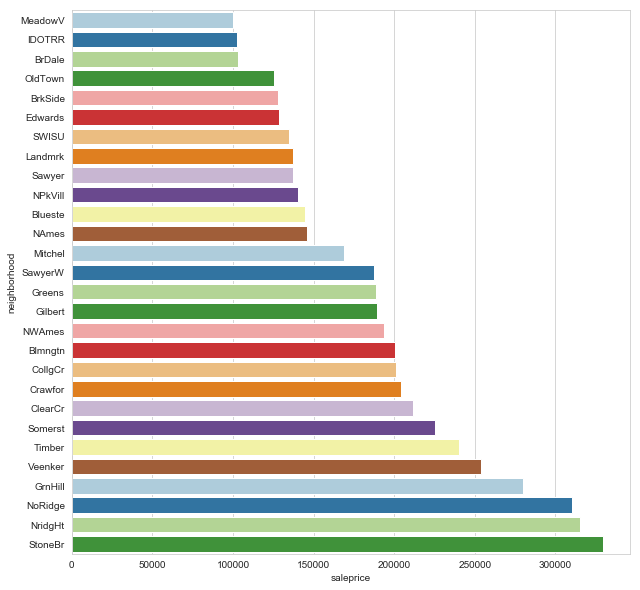

In [46]:
# Find the average price of sales by neighborhood
hood_price = df_train.groupby(['neighborhood']).mean()[['saleprice']].sort_values('saleprice')


# Bar plot to show different prices for different neighborhoods
fig, ax = plt.subplots(figsize= (10,10))
sns.barplot(x=hood_price['saleprice'], y=hood_price.index, palette="Paired", ax = ax);

In [48]:
 #Average price by year sold to get % chane overall
price_year = df_train.groupby('yr_sold').mean()[['saleprice']]

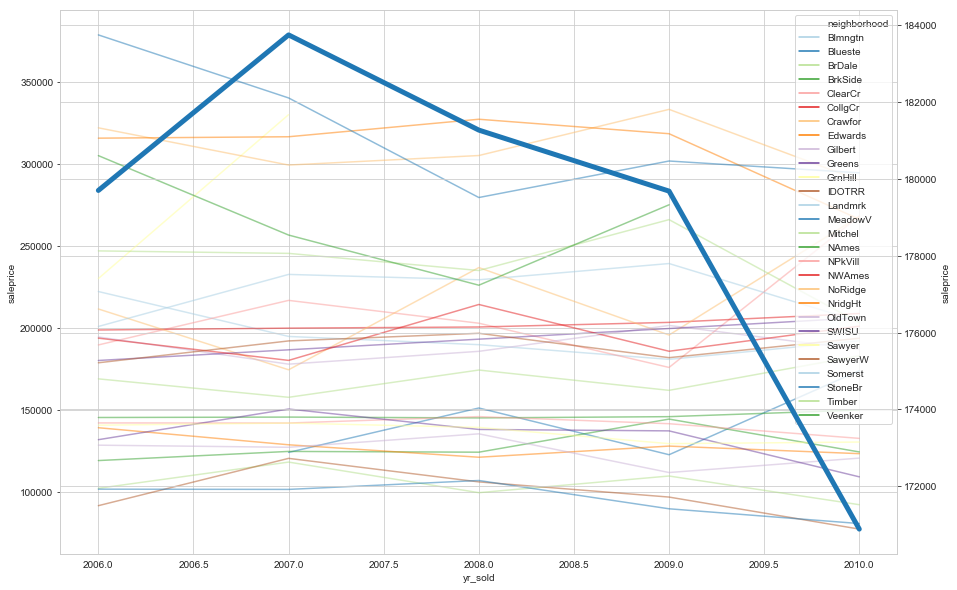

In [49]:
# Line plot to show average house prices year over year by neighborhood
price_yoy_hood = df_train.groupby(['neighborhood', 'yr_sold']).mean()[['saleprice']]
price_yoy_hood = price_yoy_hood.reset_index()

fig, ax = plt.subplots(figsize= (15,10))
ax2 = ax.twinx()
sns.lineplot(x="yr_sold", y="saleprice",
                  hue='neighborhood',
                  palette = 'Paired',
                  data=price_yoy_hood,
             alpha = 0.5,
            ax = ax)

# Plotting overall average sale prices on top 
sns.lineplot(x=price_year.index, y="saleprice",
                  palette = 'Paired',
                  data=price_year,
         dashes = True,
             linewidth = 5,
                 ax = ax2);

In [51]:
 #% change YoY in avg housing prices by neighborhood 
 price_yoy_hood.describe()

,yr_sold,saleprice
count,128.000000,128.000000
mean,2007.960938,185259.240131
std,1.427527,67362.650339
min,2006.000000,77115.285714
25%,2007.000000,131307.352941
50%,2008.000000,180025.125000
75%,2009.000000,218016.593750
max,2010.000000,378657.636364


In [55]:
# % change YoY in avg housing prices by neighborhood 
#ENTIRE code for % YoY change was googled (https://www.ritchieng.com/machine-learning-project-boston-home-prices/)

price_pivot = price_yoy_hood.pivot(index= 'neighborhood', columns = 'yr_sold', values = 'saleprice')

In [56]:
# Return % change in price
pct_change = []
for i, row in price_pivot.iterrows():
    pct_change.append(
        
        # Gets the first and last valid number (not null)
        (price_pivot.loc[i, price_pivot.loc[i, :].last_valid_index()] - 
         price_pivot.loc[i, price_pivot.loc[i, :].first_valid_index()])/
        price_pivot.loc[i, price_pivot.loc[i, :].first_valid_index()]
        )
    

In [57]:
# New column percent change in price pivot
price_pivot['pct_change'] = pct_change

In [58]:
# Make the % into more readable format
price_pivot['pct_change'] = price_pivot['pct_change'].apply(lambda x: np.round(x,2) * 100)

In [59]:
# Sort values in order to plot bar chart from ascending
price_pivot = price_pivot.sort_values('pct_change')

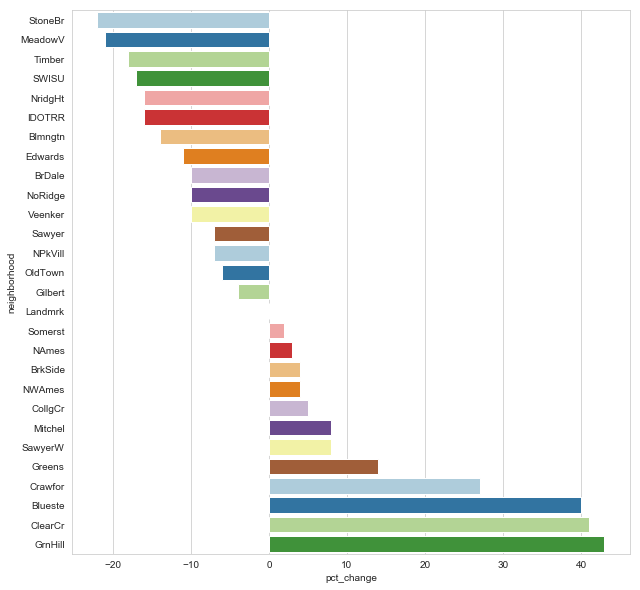

In [61]:
# Bar plot to show different % change for different neighborhoods
fig, ax = plt.subplots(figsize= (10,10))
sns.barplot(x=price_pivot['pct_change'], y=price_pivot.index, palette="Paired", ax = ax);

Green hills is a retirement community
Clear creek is right by a body of water/lake
Bluestem is right next to iowa state university

In [64]:
# House prices actually went down from the time span of 2006 - 2010
# Because of the housing market crash in 2008 
# Market had not recovered by 2010
# Change in house prices from 2006 to 2010

(price_year.iloc[4] - price_year.iloc[0])/price_year.iloc[0] * 100

saleprice   -4.9004
dtype: float64

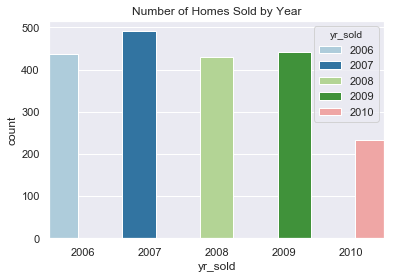

In [130]:
# Bar chart of home sales year over year
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(data = df_train, 
              x = 'yr_sold',
              hue = 'yr_sold', 
              palette = 'Paired',
             ax = ax)

# Code for changing bar width from: 
# https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(ax, .5)
plt.title('Number of Homes Sold by Year');

In [ ]:
# Alphabetically order column names to make it easier to compare graphs
alpha_order = list(df_train['Neighborhood'].unique())
alpha_order.sort()
alpha_order

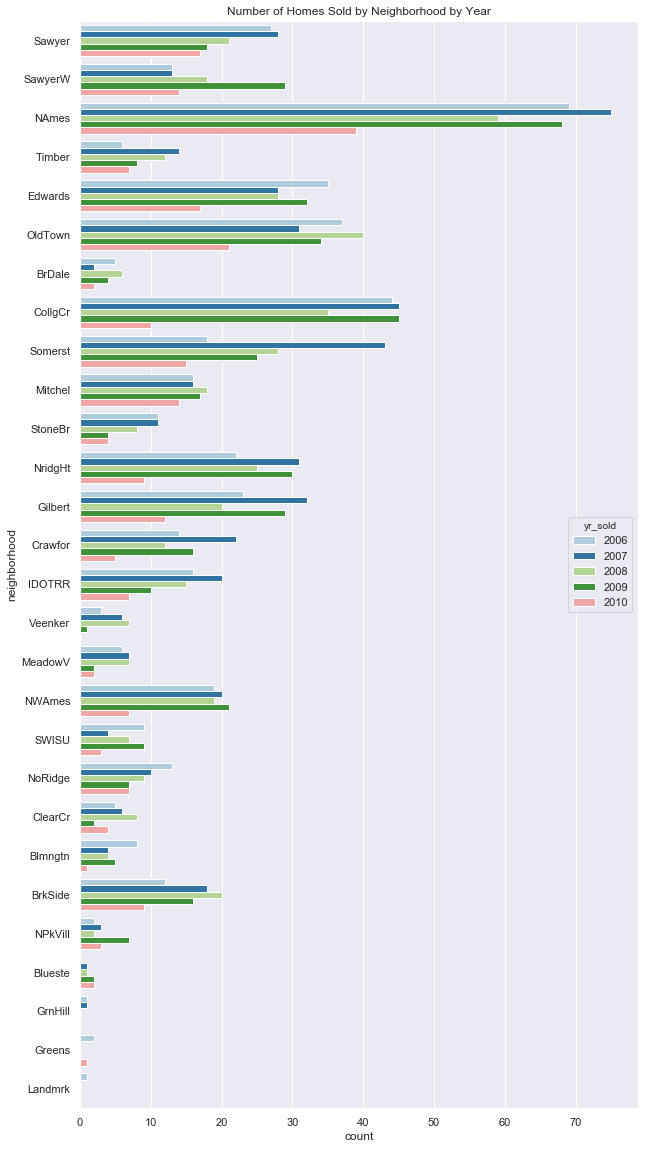

In [78]:
# Plot the number of homes sold by neighborhood by year
fig,ax = plt.subplots(figsize = (10,20))
sns.countplot(data = df_train, 
              y = 'neighborhood',
              hue = 'yr_sold', 
              palette = 'Paired',
             ax = ax)

plt.title('Number of Homes Sold by Neighborhood by Year');

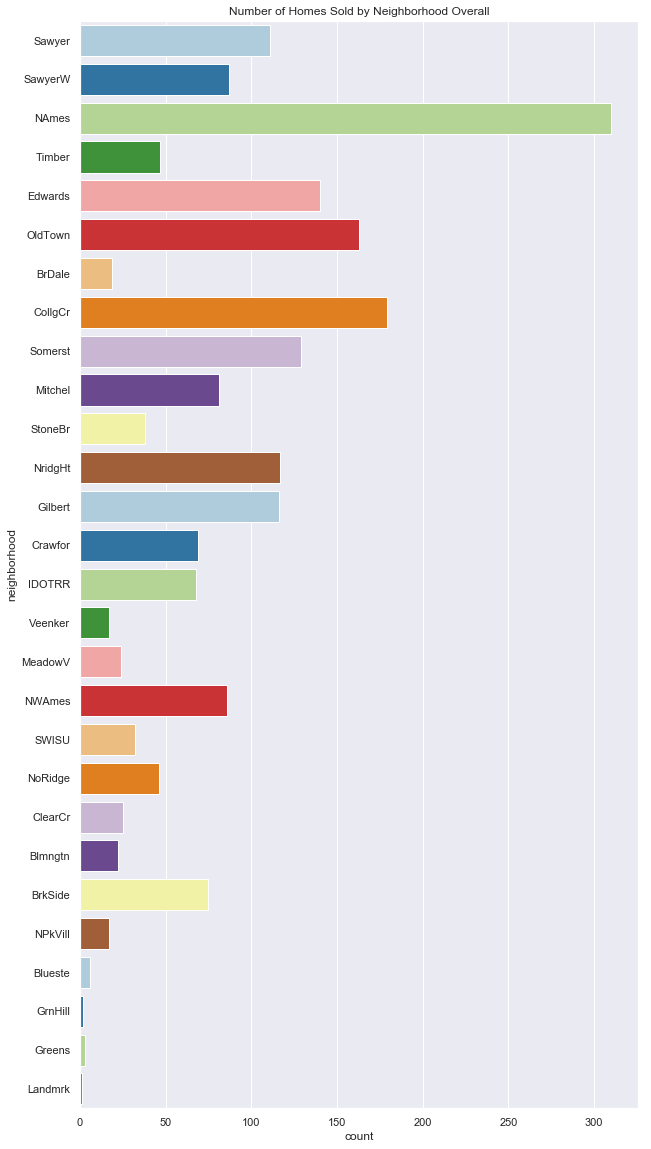

In [81]:
# Plot the number of homes sold overall (2006-2010)
fig,ax = plt.subplots(figsize = (10,20))
sns.countplot(data = df_train, 
              y = 'neighborhood', 
              palette = 'Paired',
             ax = ax)

plt.title('Number of Homes Sold by Neighborhood Overall');

In [97]:
# Most expensive and least expensive homes sold in which neighborhoods?
price_expensive = df_train['saleprice'].quantile(q = .75)
# Use the 75th quantile as the baseline for 'expensive' home sale prices
print(f"The most expensive house cost $ {price_expensive}")

The most expensive house cost $ 213000.0


In [98]:
# New data frame to isolate just expensive homes
expensive_homes = df_train[df_train['saleprice']> price_expensive]

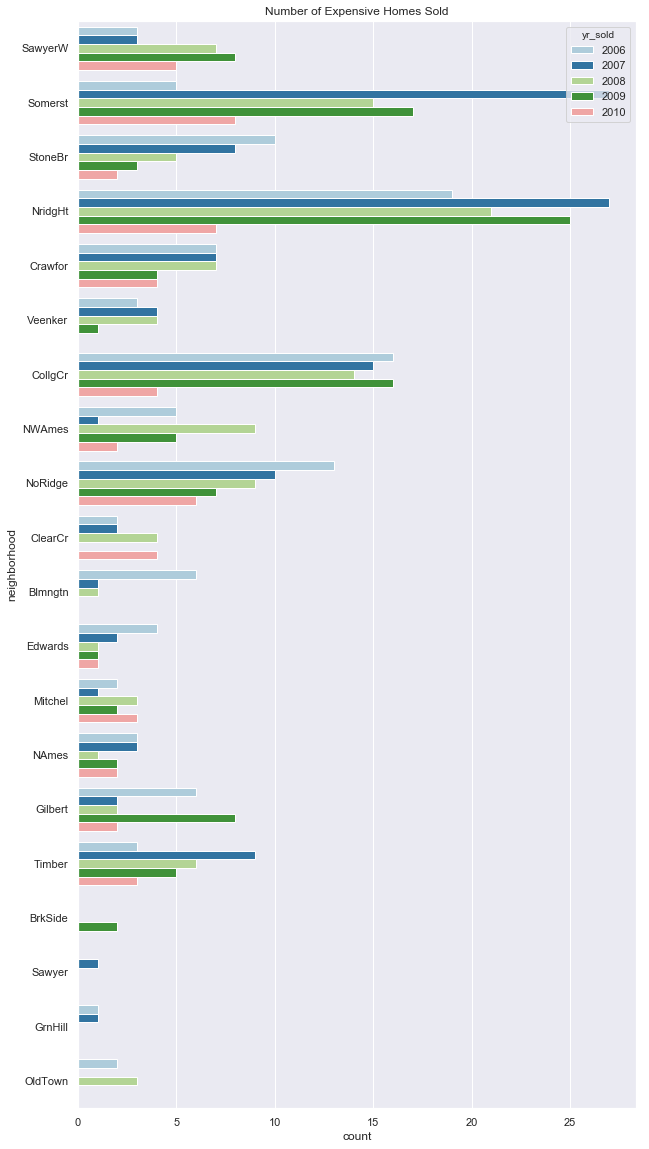

In [104]:
# Plot number of expensive homes sold by neighborhood
fig,ax = plt.subplots(figsize = (10,20))
sns.countplot(data = expensive_homes, 
              y = 'neighborhood',
              hue= 'yr_sold',
              palette = 'Paired',
             ax = ax)

plt.title('Number of Expensive Homes Sold');

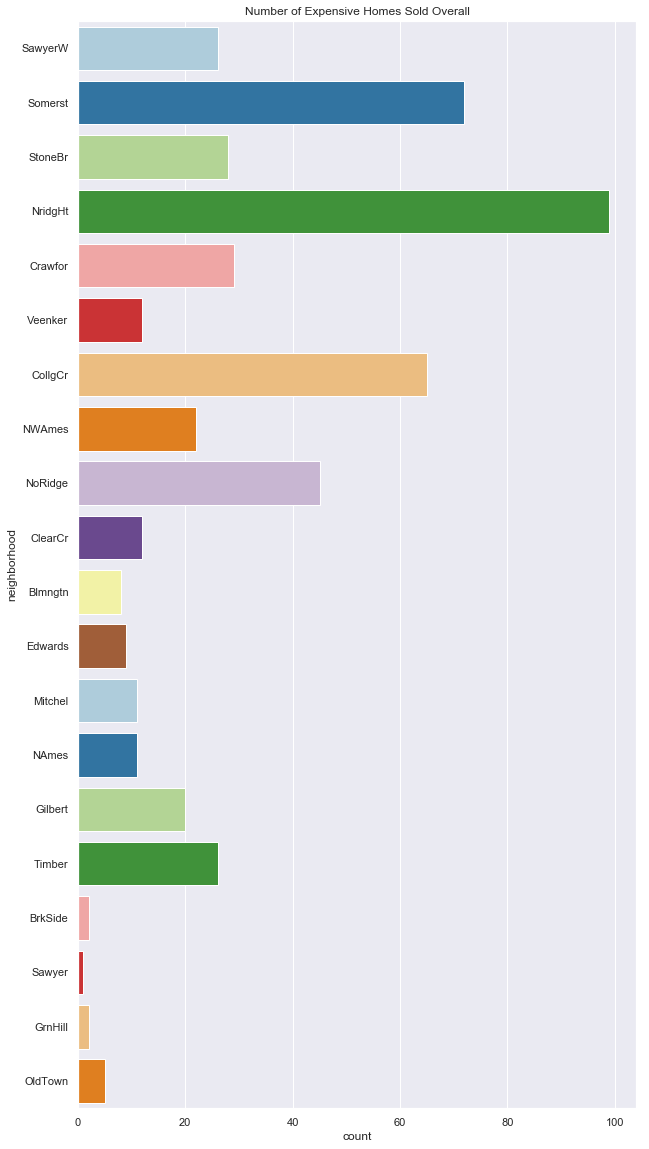

In [106]:
# Number of expensive homes sold overall
fig,ax = plt.subplots(figsize = (10,20))
sns.countplot(data = expensive_homes, 
              y = 'neighborhood',
              palette = 'Paired',
             ax = ax)

plt.title('Number of Expensive Homes Sold Overall');

In [112]:
#  cheap homes
price_cheap = df_train['saleprice'].quantile(q = .25)
cheap_homes = df_train[df_train['saleprice'] < price_cheap]

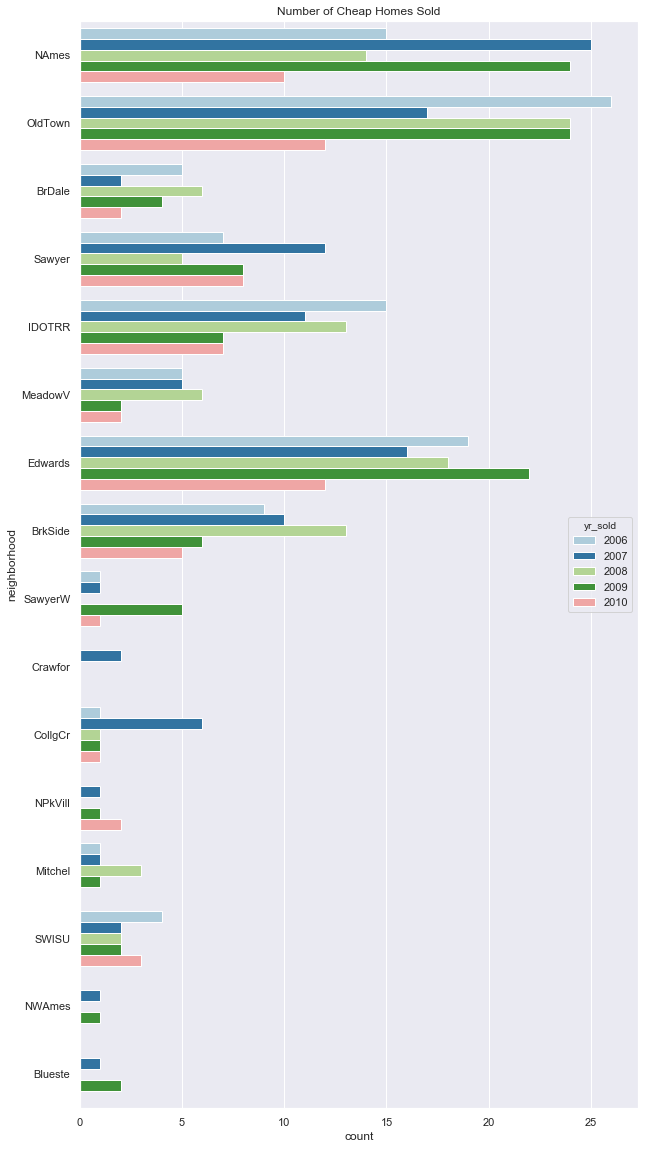

In [116]:
# Plot the number of cheap homes sold by neighborhood
fig,ax = plt.subplots(figsize = (10,20))
sns.countplot(data = cheap_homes,
              y = 'neighborhood',
              hue = 'yr_sold',
              palette = 'Paired',
            ax = ax)

plt.title('Number of Cheap Homes Sold');

# Conclusion

It was really chalenging ptoject that takes tremendous amount of time and can be used a Capstone. It is one of my discoveries by the end of this research. 

I wanted to engeneer features that will help to predict sale price of houses in more accurate way and help seelers and buyers in desicion making process. I identified factors that influence on price such as location , square footage and even garage. Also I cretaed feautres to better understand classification of expenses.
*For example: for a studio, which is 'X' square feet the price is "$$ . *However the price is doubled for the same size 'X' sqft which is named 1 bedroom.*

Based on my Ridge model, the top features that influence the value of a home are:  **Overall Quality** and **Gr Liv Area**. Ridge perfomed better on the traing set. But our model is slightly overfitted. 

Out of these values, Garage Yr Blt has the most negative impact while 2nd Flr SF has the most positive impact.

Homeowners can improve their Garage Qual since the more infuential features are generally fixed and there isn't much that can be done. The first neighborhood to show up as a positive influence is: Neighborhood_NridgHt

Keep in mind that model was fitted to the data that was available in Ames, Iowa and is not representative of the entire country nor could it be used to calculate the price of a home in another state. For example, New York home prices are significantly higher than prices in Iowa. If we gather more data from across the country, we can have a better understanding. However, even then, we wouldn't be able to generalize because not all parts of the country care about the same features. Some parts of the country really care about space, where in New York, space is already limited so home buyers look for other features that make their home valuable

Source Documentation
Also I took a look at location of cheapest and most epensive houses.According my analysis,certain neighborhoods have benefits, they also come with their own negatives. For cheaper neighborhoods, while their remodeling rate was much higher than those of expensive ones, there is also the risk of being unable to gain a large ROI as all the other homes in the area are priced lower. With the expensive neighborhood, you run the risk of not being able to remodel enough to get a greater ROI. Also, as home prices in that area are more expensive, the price tag might make it harder to sell as quickly as possible.


Given all of this information, it will be useful to look into each neighborhood and change specific qualities of homes to see its predicted price.I would recommend to add to this research schools and gyms and take them into consideration as well. The model will be useful for being able to estimate house prices from a one unit change in certain features. It can estimate the ROI and isolate which houses have the most potential for remodeling.

Taking timing into account, I would add housing market crises as one of criteria to this research. It has obvious affect on our datasets and impact prediction of on sale price. This model was built strictly  for the Ames home market. Additionally, I wouldnt reccomend to apply it. Based on my analysis, there are a lot of missing data, quality of given information is low, and to build accurate model needs more time and more related information. 